<h1 style="font-size:40px;"><center>Exercise III:<br> Convolutional and Recurrent Neural Networks
</center></h1>

## Short summary
In this exercise you will: 

* Train CNNs for a binary classification problem
* Visualize how CNN interprets the data
* Train a CNNs for two 3-class classification problem
* Train RNN on a time series prediction problem
* Visualize how RNN hidden node activities
* Sample from a RNN character model

In this lab we will look at network architectures that are designed to handle specific kinds of data. Convolutional Neural Networks for image processing and Recurrent Neural Networks for time series processing

**Deadline for submitting the report: January 3, 13:00 (2022)**

## The data
Digits "5" and "6" from the MNIST database used for a binary classification problem.

A dataset consisting of circles, rectangles or triangles, that can be read using the *loadImagesCRT* function.

A dataset consisting of three different types of rectangles, squares, "horizontal" rectangles and "vertical" rectangles. This data can be read using the *loadImagesR3* function.

A dataset consisting of pairs of times series. The input time series is a train of rectangle pulses, and the output is triangles, i.e. an up-ramp followed by a down-ramp. For more details see the cell *Ex4-1*. The task is to train a recurrent network that predicts the triangle time series from the pulse time series.

The last exercise is using the Tensorflow source code (C++) represented as a long sequence of characters. See that cell for more details.

## The exercises
As for the previous lab all exercises are found below.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Data | Needed | Loading images for the CNN exercise |
| 3 | PlotImg | Information  | View some of the images |
| 4 | Stats | Needed | Compute classification results |
| 5 | Visualization | Needed | Visualize layers of a CNN |
| 6 | Ex1 | Exercise | For question 1-2 |
| 7 | Ex2 | Exercise | For question 3 |
| 8 | Ex3 | Exercise | For question 4-5 |
| 9 | Ex4-1 | Exercise | For question 6-9 |
| 10 | Ex4-2 | Exercise | For question 6-9 |
| 11 | Ex4-3 | Exercise | For question 6-9 |
| 12 | Ex5-1 | Exercise | For question 10-11 |
| 13 | Ex5-2 | Exercise | For question 10-11 |


In order for you to start with the exercise you need to run all cells with the CellType "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun again!




### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries
In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".


In [1]:
import numpy as np
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt

### CellName: Data (#2)
### CellType: Needed
### Cell instruction: Function for getting images for the CNN exercises

This cell defines the functions that obtain the images needed for the CNN exercise. Note! Later when you actually call these function, if it can't find the files, make sure the "crt-trn/" and "crt-tst/" folders are available in the same directory as this notebook file.

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def load_pics(folder,N):
    import imageio
    imgs = []
    for i in range(N):
        img = imageio.imread(folder+"img_{:05}.png".format(i+1))
        ch = img[:,:,0]
        imgs.append(ch)
    return np.array(imgs)

def load_labels(fn):
    return np.loadtxt(fn, usecols=(0,1,2))

def loadImagesCRT():
    base = "./"
    trainpic = load_pics(base + "crt-trn/", 500)
    valpic = load_pics(base + "crt-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"crt-trn_trg.csv")
    #ytrain = ytrain[:N]
    yval = load_labels(base+"crt-val_trg.csv")
    
    return xtrain, ytrain, xval, yval, width, height

def loadImagesR3():
    base = "./"
    trainpic = load_pics(base + "r3-trn/", 500)
    valpic = load_pics(base + "r3-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"r3-trn_trg.csv")
    #ytrain = ytrain[:500]
    yval = load_labels(base+"r3-val_trg.csv")

    return xtrain, ytrain, xval, yval, width, height


def loadMNIST56():
    xtrain, ytrain, xval, yval = np.load("mnist56.npy", allow_pickle=True)
    width, height = xtrain.shape[1:3]
    return xtrain, ytrain, xval, yval, width, height


### CellName: PlotImg (#3)
### CellType: Information
### Cell instruction: Show some of the images

Here we look at the first ten pictures in the training set, and their respective targets. You can select the dataset to look at by uncomment the correct line.

Run the cell by entering into the cell and press "CTRL Enter".

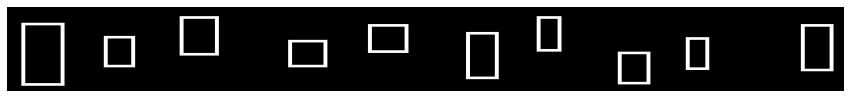

Targets:
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [3]:
#xTrn, dTrn, xVal, dVal, width, height = loadMNIST56()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesCRT()
xTrn, dTrn, xVal, dVal, width, height = loadImagesR3()

rndSel = np.random.randint(500, size=10)
plt.figure(1, figsize=(15,10))
plt.imshow(xTrn[rndSel,:,:].swapaxes(0,1).reshape(width,10*height),cmap="gray")
plt.axis("off")
plt.show()

print("Targets:")
print(dTrn[rndSel])


### CellName: Stats (#4)
### CellType: Needed
### Cell instruction: Get binary and 3-class classification results

This cell just defines functions that we can call to compute som performance measures for binary and 3-class classification problems.

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def binary_pred_stats(ytrue, ypred, threshold=0.5):
    one_correct = np.sum((ytrue==1)*(ypred > threshold))
    zero_correct = np.sum((ytrue==0)*(ypred <= threshold))
    sensitivity = one_correct / np.sum(ytrue==1)
    specificity = zero_correct / np.sum(ytrue==0)
    accuracy = (one_correct + zero_correct) / len(ytrue)
    return sensitivity, specificity, accuracy

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)


### CellName: Visualization (#5)
### CellType: Needed
### Cell instruction: Function that can visualize the different layers of a CNN

This cell is feeding an image through a CNN and stores the intemediate values. It plots the different layers (filtered images) either before or after maxpooling.

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def layerVisaliztion(model,
                     indata,
                     target,
                     idx=10,
                     post_pool = False):

    # The prediction for the test case
    #idx_pred = model.predict(indata)[idx,0]
    #print('True label: = {:0.1f}, Prediction = {:0.8f}'.format(idx_pred, target[idx]))
    
    print('Prediction: ', model.predict(indata)[idx])
    print('Target    : ', target[idx])
    
    kind = MaxPooling2D if post_pool else Conv2D
    outs = [l.output for l in model.layers if isinstance(l, kind)]
    intermediate = K.function([model.layers[0].input], outs)
    
    states = [indata[idx:idx+1]] + intermediate([indata[idx:idx+1]])
    plt.figure(figsize=(18,12))                    
    for k,s in enumerate(states):
        plt.figure(figsize=(18,12))
        plt.subplot(len(outs)+1,1,k+1)
        pics = s[0]
        pics = np.rollaxis(pics,2,0)
        rows = 2 if pics.shape[0] > 8 else 1
        cols = pics.shape[0]//rows
        pad = pics.shape[0]-rows*cols
        if pad > 0:
            padding = np.zeros_like(pics, shape=(rows-pad,)+pics.shape[1:])
            pics = np.concatenate([pics, padding])
            cols = cols + 1            
        imgshape = pics.shape[1:]
        pics = pics.reshape((rows,cols)+imgshape)
        pics = pics.swapaxes(1,2)
        pics = pics.reshape((pics.shape[0]*pics.shape[1], pics.shape[2]*pics.shape[3]))
        extent = (0,cols*imgshape[0], 0,rows*imgshape[1])
        plt.imshow(pics,cmap='gray',extent=extent)
        for r in range(1,rows):
            plt.plot([0,cols*imgshape[0]], [r*imgshape[1], r*imgshape[1]], color='r', linestyle='-', linewidth=1)
        for c in range(1,cols):
            plt.plot([c*imgshape[0], c*imgshape[0]], [0,rows*imgshape[1]], color='r', linestyle='-', linewidth=1)


### CellName: Ex1 (#6)
### CellType: Exercise
### Cell instruction: Instructions for question 1-2

## CNN for image classification

In this first exercise you are going to train a CNN that can separate between numbers "5" and "6" from the mnist dataset (mnist56 dataset). We are going to use 2000 training images and 1850 validation images. To start with we have a proposed CNN that can solve this problem. It consists of the following:
* First convolutional layer consisting of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Second convolutional layer of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Special layer *Flatten()*, just transforms the all of the max pooled filter outputs to a linear vector of outputs
* *Dense* layer, meaning a fully connected MLP like layer with 10 nodes, again ReLU activation
* Final output layer consisting of one single output node with sigmoid activation function because we have a binary classification problem.

The default is to use *stride* = 1 and no *padding*. 

#### Question 1
Make sure you understand the definition of the CNN model in the cell below and train it. **What is your validation set performance in terms of the accuracy?**

#### Question 2
This image classification problem should be relatively easy since a "5" has some distinct differences from a "6". Experiment with the architecture of the CNN model and try to make it smaller (in terms of the number of trainable parameters), but with the same almost perfect validation accuracy (>98%). **How many parameters do you have in your trimmed model and state your architecture?**

**Hint:** There is of course very many ways you can make a smaller architecture. You do not need to test all of them!


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 4)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 4)           148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

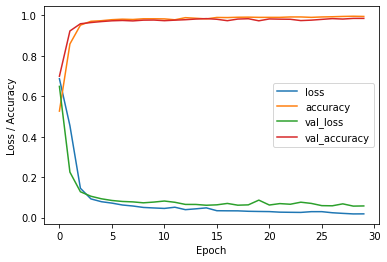

training: Accuracy = 0.9975, Sensitivity = 0.9970, Specificity = 0.9980 

validation: Accuracy = 0.9849, Sensitivity = 0.9833, Specificity = 0.9865 



In [6]:
# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu', strides = (2,2), input_shape=input_shape))
ex1.add(MaxPooling2D(pool_size=(2, 2)))


# Second conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu',strides = (2,2)))
#ex1.add(Conv2D(4, kernel_size=(5, 5), activation='relu'))
ex1.add(MaxPooling2D(pool_size=(2, 2)))
#ex1.add(MaxPooling2D(pool_size=(4, 4)))

#Third conv layer
#ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
#ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex1.add(Flatten())
ex1.add(Dense(10, activation='relu'))

# Output layer
ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex1.summary()

# Now train the ex1
estimator_ex1 = ex1.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=0)


# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Get the training predictions and results for those
d_trn_pred = ex1.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex1.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')


### CellName: Ex2 (#7)
### CellType: Exercise
### Cell instruction: Instructions for question 3

You are now going to take a look into the CNN model. There are many attempts to visualize how the CNN model is making classifications. We will here just look at the different layer outputs given an input image. The function 'layerVisualization', found in cell #5 does the following:
* Use one selected image from the supplied dataset.
* Make a forward pass through the CNN remembering all intermediate values.
* Plot all of the "filters" for each of the layers.
* One can select to plot before or after the MaxPooling.

You pass the model that you want to visualize to the 'layerVisualization' function. If you do not change the names in cell (Ex1) it will be 'ex1'.

#### Question 3
Train a CNN for the "5" vs "6" problem! As a suggestion use the following CNN

*3x(3x3 kernel)-maxpool-3x(3x3 kernel)-maxpool-(Flatten)-Dense(5)-Dense(1)*

Make sure that your trained model gives good validation results (i.e. > 95% accuracy). Having such a model, you can run the cell below. There are two parameters you need to specify, *idx* and *post_pool*. The *post_pool* variable can be set to *True* meaning that filters will be shown after MaxPooling. The image to show is selected by the *idx* variable. As an example, the following values represent,
* idx=1 number "6"
* idx=2 numner "5"
* idx=3 another number "6"
* idx=5 antoher number "5"

**Can you find some property in the filters that makes sense when it comes to separating "5" from "6"?**

Hint! If you repeat the training you most likely get a new network and other filters!


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 3)         84        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 3)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 75)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 380       
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

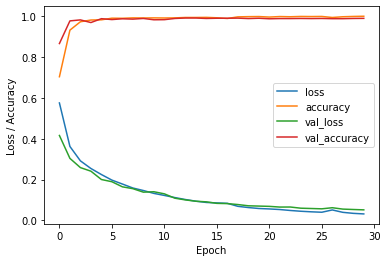

training: Accuracy = 0.9990, Sensitivity = 0.9990, Specificity = 0.9990 

validation: Accuracy = 0.9892, Sensitivity = 0.9896, Specificity = 0.9888 

Prediction:  [0.05445015]
Target    :  0.0


<Figure size 1296x864 with 0 Axes>

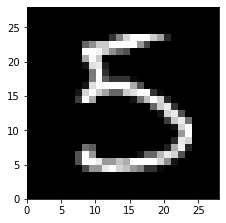

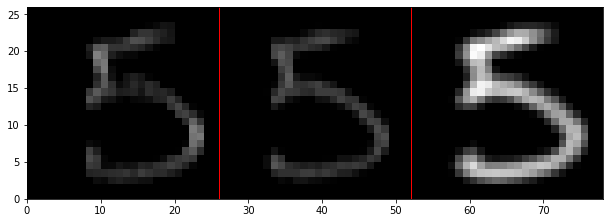

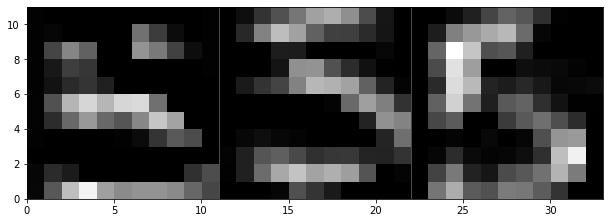

In [34]:
# Show before or after MaxPooling
post_pool = False #before
#post_pool = True #after

# The test image to look at
idx = 2

# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(3, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex1.add(MaxPooling2D(pool_size=(2, 2)))


# Second conv layer
ex1.add(Conv2D(3, kernel_size=(3, 3), activation='relu'))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex1.add(Flatten())
ex1.add(Dense(5, activation='relu'))

# Output layer
ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex1.summary()

# Now train the ex1
estimator_ex1 = ex1.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=0)


# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Get the training predictions and results for those
d_trn_pred = ex1.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex1.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')


# Call the visualization method, giving the model and the validation data to select the case from
layerVisaliztion(ex1, x_val, d_val, idx, post_pool)

### CellName: Ex3 (#8)
### CellType: Exercise
### Cell instruction: Instructions for question 4-5

## CNN for image classification

In this exercise you are going to train a CNN that can separate between circles/squares/triangles found in the CRT dataset, and the three different types of rectangles found in R3 dataset. We are going to use 500 training images and 1000 validation images. Code are provided for loading the data, training the model and presenting the result. Your task is to define the actual CNN model and see how it performs. For the following two questions you can optimize the model based on the validation performance. Here we assume that 1000 validation images is large enough such that "model selection overtraining bias" is small.

#### Question 4
Define your own CNN model for classifying the images in the CRT data into three classes. **Provide the details of your CNN model and present the validation result.**

**Hint:** Remember the difference between a binary classifier and a multi-class classifier!


#### Question 5
Define your own CNN model for classifying the images in the R3 data into three classes. **Provide the details of your CNN model and present the validation result.** **Why is this a more difficult problem?**


#### Bonus task 
The bonus tasks are provided if you have extra time and want to continue to explore the CNNs. **These tasks are not required for the course and does not influence any grading**. 

You can use the *layerVisualization* method also for above models (Q4 and Q5). It will show you the different filter outputs. Again try to understand the features the different filter learn to separate between circles-triangles-rectangles, or the rectangles for the R3 data set.

Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_259 (Conv2D)          (None, 62, 62, 5)         50        
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 60, 60, 4)         184       
_________________________________________________________________
max_pooling2d_224 (MaxPoolin (None, 15, 15, 4)         0         
_________________________________________________________________
conv2d_261 (Conv2D)          (None, 13, 13, 4)         148       
_________________________________________________________________
max_pooling2d_225 (MaxPoolin (None, 6, 6, 4)           0         
_________________________________________________________________
conv2d_262 (C

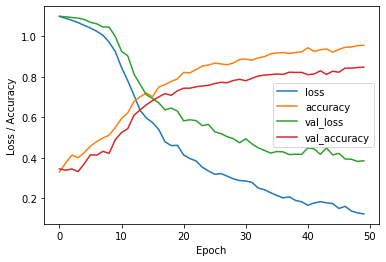

Training  log_loss:   0.11585891616841178
Training  accuracy:   0.958 



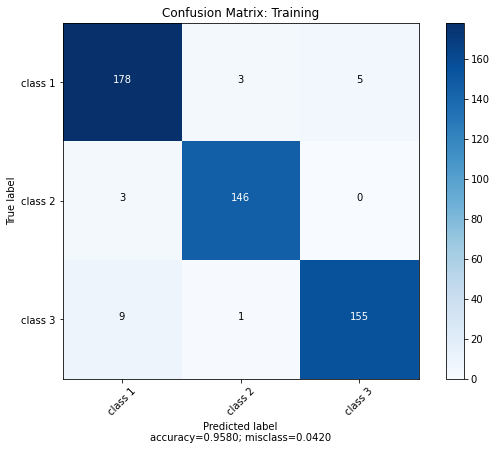

Validation  log_loss:   0.38542188138475697
Validation  accuracy:   0.848 



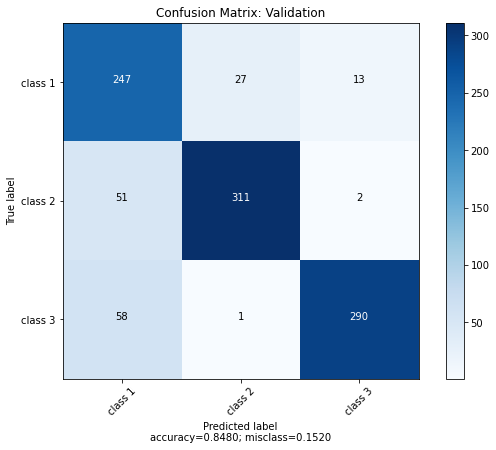

In [88]:
# Load the CRT dataset (Question 4)
#x_trn, d_trn, x_val, d_val, width, height = loadImagesCRT()

# Load the R3 dataset (Question 5)
x_trn, d_trn, x_val, d_val, width, height = loadImagesR3()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex3
ex3 = Sequential()

#
# YOUR CODE HERE
#Q4
# First conv layer 
#ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
#ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
#ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Third conv layer 
#ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
#ex3.add(MaxPooling2D(pool_size=(2, 2)))


# Fully connected MLP layers
#ex3.add(Flatten())
#ex3.add(Dense(5, activation='relu'))

# Output layer
#ex3.add(Dense(3, activation='softmax'))


#Q5
# First conv layer 
ex3.add(Conv2D(5, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(4, 4)))
#ex3.add(MaxPooling2D(pool_size=(6, 6)))

# Third conv layer 
ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))
#ex3.add(MaxPooling2D(pool_size=(8, 8)))

# Third conv layer 
ex3.add(Conv2D(2, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex3.add(Flatten())
ex3.add(Dense(7, activation='relu'))

# Output layer
ex3.add(Dense(3, activation='softmax'))


# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.003)
ex3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3.summary()

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')

Prediction:  [7.6092524e-04 9.9923873e-01 3.4164862e-07]
Target    :  [0. 1. 0.]


<Figure size 1296x864 with 0 Axes>

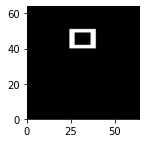

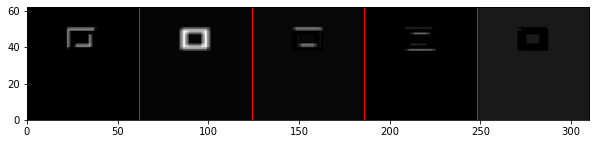

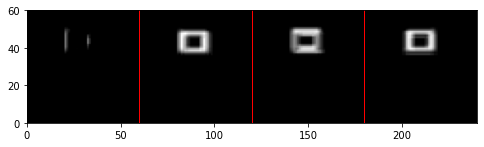

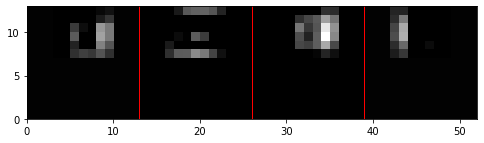

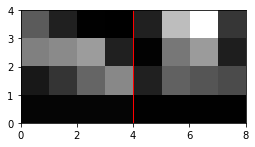

In [89]:
# Show before or after MaxPooling
post_pool = False

# The test image to look at
idx = 6

# Call the visualization method, giving the model and the test data to select the case from
layerVisaliztion(ex3, x_val, d_val, idx, post_pool)

### CellName: Ex4-1 (#9)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
We will now look at recurrent networks! This exercise is using divided into three cells below. We start by loading and visualizing the data. **Note!** The actual questions for this part can be found in cell *Ex4-3* below.

### Loading and visualizing the data
The cell below loads the training data and the validation data from existing binary python files and plots one set of training/validation data, both the input sequence and the target sequence. Run the cell by entering into the cell and press "CTRL Enter".

How is data generated? The input sequence consists of square pulses with varying length and height. The waiting time between the pulses is also varying within some predefined ranges. The lower limit is 2 times the length of the previous pulse. The target triangle pulse sequence is built from the input sequence as follows:
* the triangle pulse start when the input square pulse have ended.
* the width of the triangle (at the base) is twice the width of the square pulse.
* the height of the triangle is the same as the height of the square pulse.

The task is now to learn this mapping using a recurrent neural network. There are 500 input/target sequences in the training data and 500 in the test data.


Training data input shape:  (500, 100)
Training data output shape:  (500, 100)
Validation data input shape:  (500, 100)
Validation data output shape:  (500, 100)


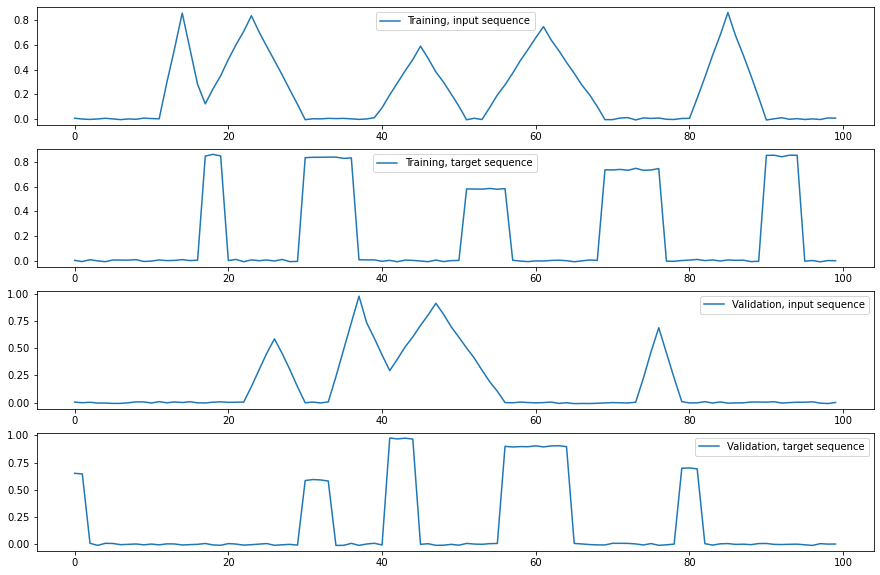

In [6]:
# Load data from files
x_trn,d_trn= np.load("pulsedata1-trn.npy")
x_val,d_val = np.load("pulsedata1-val.npy")
#x_trn,d_val= np.load("pulsedata2-trn.npy")
#x_val,d_val = np.load("pulsedata2-val.npy")

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# If this is set to True, then we have the reverse problem. Input triangle pulse, target square puls.
#if False:
if True:
    d_trn,x_trn = x_trn[:,::-1],d_trn[:,::-1]
    d_val,x_val = x_val[:,::-1],d_val[:,::-1]

ns,tlen = x_trn.shape
t = np.arange(tlen)

# The training / test case to look at
i = 3

# Plot
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(t,x_trn[i,:])
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,d_trn[i,:])
plt.legend(['Training, target sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,x_val[i,:])
plt.legend(['Validation, input sequence'], loc=0)

plt.subplot(4,1,4)
plt.plot(t,d_val[i,:])
plt.legend(['Validation, target sequence'], loc=0)


### CellName: Ex4-2 (#10)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### define the model and train
Here we are going to setup the model and train it. There are three different models to choose from: 
* SimpleRNN: Simple feedback weights where the output from a node is feeding back to itself. For several hidden nodes there are feedback weights to all other nodes in the layer.
* LSTM: The LSTM unit
* GRU: The GRU unit

The standard choice of activation function is *tanh*, but you can also test *relu*. When it comes to training this model we are goint to use a possible truncated BPTT approach. The support in Keras for doing this is somewhat limited so here it is implemented manually. In short we have 500 training sequences and we define a mini-batch size *mb* that selects *mb* of these sequences to train using the normal stochastic gradient descent idea. Then we have a variable *batchlen* that is the length of the sequence to use in truncated BPTT. The default values for these are *mb=10* and *batchlen=50*. If you want to train without the truncated BPTT approach put *batchlen=100*.

During training we print the normalized training and validation error. Normalized means here that the loss (=MSE) is divided by the variance of the target signal. So that a normalized error of 1 is not so good, but if we get below 0.1 (or so) it means that the error is much smaller than the signal itself.

What you need to do in this cell is to define your model and train it.

In [20]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
#net = SimpleRNN
#net = GRU
net = LSTM

# Number of hidden nodes
#nh1 = 5
nh1 = 3

# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

model = Sequential()
model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
model.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

model.add(TimeDistributed(Dense(1)))

#adam = Adam(lr=0.003)
adam = Adam(lr = 0.005)
model.compile(optimizer=adam,loss='mean_squared_error')
model.summary()

# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (10, 50, 3)               60        
_________________________________________________________________
lstm_7 (LSTM)                (10, 50, 10)              560       
_________________________________________________________________
time_distributed_13 (TimeDis (10, 50, 1)               11        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     7.09        0.79835     0.51251
2     3.90        0.44045     0.40238
3     3.85        0.39479     0.36828
4     4.12        0.34017     0.36027
5     3.89        0.28464     0.26331
6     4.01        0.23493     0.21381
7     3.85        0.22273     0.19587
8     4.14        0.19675     0.18466
9     3.93        0.18740     0.17277
10   

### CellName: Ex4-3 (#11)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Plot the result
In this cell we just plot the result for one of the first *mb* (minibatch size) test sequences. You can select which of these ones by an index (see the code). Also, the last graph shows the hidden node activation for all of the hidden nodes. **Note:** For the GRU and simpleRNN models this all of the hidden activity there is, but for the LSTM there is also the memory signal. This one is not shown!

### Questions
We are now finally at the point of asking questions. Whenever you define a new model and train it, you need to run the  cell below in order to show the result for the newly trained model. 

**Hint!** For all of the questions below you are going to train different models. Keep an eye on how the training error is developing. If you see large fluctuations, you may to change the learning rate. The default value of 0.003 should be OK for most trainings. 

#### Question 6
(Just to get started!) Define a simpleRNN model with 5 hidden nodes and train it for about 20 epochs. **What validation error do you obtain?** 

Hint: The validation error can be found during "training" as the error for the last epoch.
Hint: You may have to train a couple of times to make sure that you did not end up in a "bad" local minima the first time.

#### Question 7
Test different models! Train the three different models (one hidden layer only) with the approximately the same number of trainable weights (around 150-200) and decide which of them that works best? **So, out of the three different models, *simpleRNN, GRU och LSTM*, which one worked best using the same number weights?**

#### Question 8
Interpretation! You are now going to interpret the hidden node outputs. Remember that the actual output for each time is a linear combination of the hidden node outputs. As said before you can see the hidden nodes output in the last plot. Note that the weights in the dense layer can have different signs so that hidden nodes outputs can be linearly combined with both positive and negatives signs. Train a *GRU* model with 3 hidden nodes for about 20 epochs. **Try to explain what the different hidden nodes are detecting**.

Comment: This is of course a question with no definite true answer. We just want you to interpret what the different nodes are doing.

#### Question 9
If you look at the top of cell *Ex4-1* you can, by changing False -> True, define the reverse problem (see top of the code cell). That is, input is the triangle pulse and target is the square pulse. This should be a more difficult problem! **Why?** **Present a RNN model that can "solve" this reverse problem (i.e. below 0.1 in test error).**

Hint: Here you can experiment with two hidden layers of LSTM/GRU/SimpleRNN nodes

#### Bonus question
The bonus tasks are provided if you have extra time. **These tasks are not required for the course and does not influence any grading**.

In cell #9 where you load the data for the pulse converter problem you can change the name of the file to read: *pulsedata1-trn.npy* -> *pulsedata2-trn.npy* and *pulsedata1-val.npy* -> *pulsedata2-val.npy*. This will load a more difficult pulse converter problem. The input sequence is almost the same, but the rule for making the target sequence is different. Instead of using the same height of the triangle pulse as the square pulse, the height now depends on all **previous** square pulse heights. The dependence is a weighted average of all previous heights, where the most recent ones have a larger weights (exponential decay of weights). The task for this bonus question is simply to train a model that can *accurately* do the conversion. For this problem there sequences are of length 500, but only 200 sequences for training.


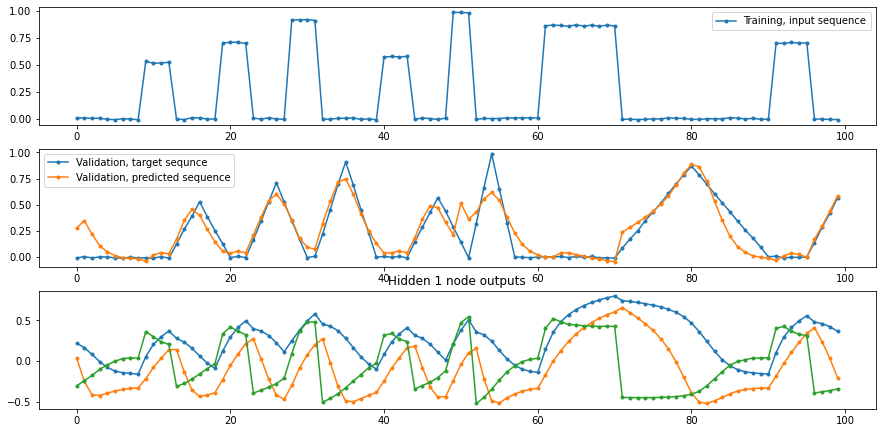

In [111]:
xshow = x_val[:mb]
dshow = d_val[:mb]
dout = np.zeros((mb,tlen))
hidden1 = np.zeros((mb,tlen,nh1))
hidden2 = np.zeros((mb,tlen,nh2))

rnn1 = model.layers[0]
rnn2= model.layers[1]

#dense = model.layers[-1]
#sign = K.sign(dense.layer.kernel)[None,None,:,0]
if len(model.layers) > 2 :
    intermediate = K.function([rnn1.input], [rnn1.output, rnn2.output ])
else :
    intermediate = K.function([rnn1.input], [rnn1.output])

for tstep in range(ntsteps):
    t1,t2 = tstep*batchlen,(tstep+1)*batchlen
    inp = xshow[:,t1:t2,None]
    if len(model.layers) > 2 :
        hi,hi2 = intermediate([inp])
        hidden2[:,t1:t2:,:] = hi2
    else :
        hi, = intermediate([inp])
    hidden1[:,t1:t2:,:] = hi
    yi = model.predict(xshow[:,t1:t2,None])
    dout[:,t1:t2] = yi[:,:,0]

t = np.arange(tlen)

# Selection of validation sequence, valid range is [0,mb]
i = 0

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.plot(t,xshow[i],'-',marker='.')
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,dshow[i],'-',marker='.')
plt.plot(t,dout[i],'-',marker='.')
plt.legend(['Validation, target sequnce', 'Validation, predicted sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,hidden1[i],'-',marker='.')
plt.title('Hidden 1 node outputs')

if len(model.layers) > 2 :
    plt.subplot(4,1,4)
    plt.plot(t,hidden2[i],'-',marker='.')
    plt.title('Hidden 2 node outputs')

### CellName: Ex5-1 (#12)
### CellType: Exercise
### Cell instruction: Instructions for question 10-11

## RNN: Sampling from a character model
As a final exercise we are going to look into an example where a recurrent network is used to predict a sequence of characters. The model is autoregressive, meaning that the previous values $\ldots, x_{i-2}, x_{i-1}$ is used to predict $x_i$. In the model characters are represented as vectors with the same number of elements as the number of unique characters in the sequence. The input in each sequence step is a single character, represented using "one-hot" coding, that is exactly one vector element is one, representing that particular character. The output is on the other hand a probability vector over all characters, which can be used to sample a character from the predictive distribution. To sample long sequences of characters, we feed one sampled character back into the network, to predict the character after that and so on.

The sequence of characters that we are going to train on is the source code of Tensorflow (C++). The size of the downloaded source code is approximately 14 Mb, which means about 14 million characters in the sequence. The number of unique characters is 103. Therefore the output layer consists of 103 nodes with a softmax activation function. The RNN model itself is rather large, it consists of two layers of 1024 LSTM nodes in each layer. In addition to that there are skip-layer connections from input to second hidden layer and skip connections from first hidden layer to the output layer. In total there are about 13.5 million weights in this model.

This model take too long time to train as part of this lab. It takes days rather than minutes to train! Therefore pre-trained weights are handed out as part of the lab material. This is the file that you needed to download from an external URL!

Given such a model we can now "sample" from it. Given some initial sequence of characters, as a seed, we can run the model for a number of sequence steps in order to find the sequence of predicted characters. But we can do more! Since the output is a vector of probabilities for new characters we can sample from it. As an example assume we only have 5 characters in our vocabulary and the prediction for a new character is:

(0.1, 0.3, 0.5, 0.0, 0.1)

So the character represented by the third position would be selected since it has the largest probability. But if we treat these number as probabilities we can say that half of the times we are going to select the third character, 30% of the time we select the character represented by the second position and so on. To even make things more random we can modify these probabilities such that they become more equal (high temperature) or that the largest probability becomes even larger (small temperature). This temperature parameter *temp* can be changed so that the sampling becomes completely random (very high *temp*) or completely deterministic (very low *temp*).

The code cell below just defines the model and loads the pre-trained weights onto the model. Run the cell! It can take some seconds to do that!


In [5]:
# set of all chars appearing in tensorflow source code:
chars = ['\t', '\n'] + [chr(x) for x in range(32,127)] + ['°', 'θ', 'μ', 'ν', '’', '\ufeff']
char_indices = dict((c, i) for i, c in enumerate(chars))

# build the model: two layers of LSTM
nh = 1024
arch = LSTM
inp = Input(batch_shape=(1, 1, len(chars)))
h1layer = arch(nh, return_sequences=True, stateful=True)
h2layer = arch(nh, stateful=True)
is_skip = True
h1 = h1layer(inp)
i2 = concatenate([inp, h1])
h2 = h2layer(i2)
h1last = Lambda(lambda h: h[:,-1,:])(h1)
rnnout = concatenate([h1last, h2])
beta_var = K.variable(1.0)
d = Dense(len(chars))(rnnout)
d = Lambda(lambda d: d * beta_var)(d)
out = Activation('softmax')(d)
m = Model([inp], [out])
m.compile(loss='categorical_crossentropy', optimizer='adam')
m.summary()

# Load the weights
m.load_weights("charmodel.h5")


The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 1, 103)]        0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (1, 1, 1024)         4620288     input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenat

### CellName: Ex5-2 (#13)
### CellType: Exercise
### Cell instruction: Instructions for question 10-11

## RNN: Sampling from a character model
In the cell below a function is defined that perform the actual sampling. It takes three parameters as input. (i) the starting sequence *seed*, (ii) the length of the sequence to generate *seqLen* and (iii) the temperature used during sampling *temp*. 

#### Question 10
Run the cell below with the given parameters. **Does it look like C++ code?**

#### Question 11
Change the seed to something else! **What happens when you decrease/increase the temperature (e.g 0.7-1.5)?**


In [9]:
def sampletxt(seed=" ", n=50, t=1.0):
    m.reset_states()
    K.set_value(beta_var, 1/t)

    for c in seed:
        x_pred = np.zeros((1, 1, len(chars)))
        x_pred[0, 0, char_indices[c]] = 1.
        p = m.predict(x_pred, verbose=[0])
        
    txt = []
    for i in range(n):
        preds = p[0].astype('float64')
        preds = preds/np.sum(preds) # some numericol issue
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)
        txt.append(chars[next_index])
        p = m.predict(probas[None,:,:], verbose=0)

    return ''.join(txt)

seed = "1"
#seed = "void "
#seed = "for (int"
seqLen = 500
#temp = 1.0
temp = 0.7

print(seed + sampletxt(seed,seqLen,temp))


1692.09f,
                                                                                                                     \
                                                                                                                                            int laso, int h, const int k, const int k, int k) {
            Eigen::array<uint32>::max());
        return input_index_;
      }
      if (output_crop_with && ares->attr_bytes() = ordered_size.size()) {
      auto local_device = e


# The report!


### Name
   Theodora Gaiceanu

### Introduction

   This lab is about analyzing some CNN and RNN models. The performance of the CNN model has been analyzed. Also, some measures have been taken in order to reduce the number of parameters in a CNN model, while keeping a high accuracy. Moreover, some CNN models have been built in order to solve binary classification of multiclass classification problems. The output of each filter has been analyzed. 


   As far as the RNN models are concerned, the performances of different models (simple RNN, LSTM, GRU) have been compared. In addition, RNN models for solving a more challenging problem have been developed. In the end, a RNN character model has been analyzed. 

### Answers to questions
**Q1.**

  1st Training:
  
   - training: Accuracy = 0.9925, Sensitivity = 1.0000, Specificity = 0.9850 
   - validation: Accuracy = 0.9886, Sensitivity = 0.9937, Specificity = 0.9832 
    
    
  2nd Training:
  
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
   - validation: Accuracy = 0.9946, Sensitivity = 0.9937, Specificity = 0.9955
    
    
  3rd Training:
  
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
   - validation: Accuracy = 0.9919, Sensitivity = 0.9875, Specificity = 0.9966 
    
    
  4th Training:
  
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
   - validation: Accuracy = 0.9919, Sensitivity = 0.9927, Specificity = 0.9910 
    
    
  5th Training:
  
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
   - validation: Accuracy = 0.9935, Sensitivity = 0.9906, Specificity = 0.9966 

  **Average validation accuracy: 0.9921**
  The model has a very high accuracy and does not have overfitting. It has 1209 trainable parameters.
    
    

**Q2.**

   **Making the kernel of the convolution layer bigger** will make smaller the hidden image. Therefore, this should reduce the number of trainable parameters.
   
   **Model with 2 convolutional layers**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 5x5, ReLU activation, maxpooling of size 2x2, flatten layer, dense layer with 10 nodes, output layer. 
   
   Performance:
   
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
    
   - validation: Accuracy = 0.9919, Sensitivity = 0.9875, Specificity = 0.9966    
   
   **Number of trainable parameters: 1105.** As it can be seen, there are less trainable parameters, but the difference is not so big.
        
        
    
   **Making the size of the maxpooling layer bigger** will also reduce the number of trainable parameters.
   
   **Model with 2 convolutional layers**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 5x5, ReLU activation, maxpooling of size 4x4, flatten layer, dense layer with 10 nodes, output layer.
   
   Performance
   
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
    
   - validation: Accuracy = 0.9924, Sensitivity = 0.9927, Specificity = 0.9922    
    
   **Number of trainable parameters: 625.** As it can be seen, increasing the size of the second convolutional layer kernel and increasing the size of the maxpooling layer has reduced a lot the number of trainable parameters. 

    
   **Model with 2 convolutional layers**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 4x4, flatten layer, dense layer with 10 nodes, output layer.
   
   Performance
   
   - training: Accuracy = 0.9980, Sensitivity = 0.9960, Specificity = 1.0000 
    
   - validation: Accuracy = 0.9838, Sensitivity = 0.9791, Specificity = 0.9888   
    
   **Number of trainable parameters: 369.** Actually, keeping the sizes of the original kernels for the convolutional layers and increasing the size of the second maxpooling layer is even better.

    
   Another easy way of reducing the number of trainable parameters is to **add more convolutional layers.**   
   
   **Model with 3 convolutional layers**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, flatten layer, dense layer with 10 nodes, output layer. 
   
   Performance:
   
   - training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
    
   - validation: Accuracy = 0.9876, Sensitivity = 0.9864, Specificity = 0.9888     
    
   **Number of trainable parameters: 397**. Just adding one more convolutional layer reduces a lot the number of trainable parameters.
   
   
   Another efficient way to reduce the size of the network is to **use a bigger stride**. 
   
   **Model with 2 convolutional layers, stride 2**: convolutional layer with 4 kernels of size 3x3 and strides 2, ReLU activation, maxpooling layer of size 2x2, convolutional layer with 4 kernels of size 3x3 and strides 2, ReLU activation, maxpooling layer of size 2x2.
   
   Performance:
   
   - training: Accuracy = 0.9975, Sensitivity = 0.9970, Specificity = 0.9980 

   - validation: Accuracy = 0.9849, Sensitivity = 0.9833, Specificity = 0.9865 
   
   **Number of trainable parameters: 249**. Just making the stride step bigger reduces a lot the number of trainable parameters (because the size of the hidden image is much smaller than the size of the input image).
   

**Q3.**

   **For number 6**, the first channel filter from the first convolutional layer is just a blurred version of the number. The second channel filter from the first convolutional layer makes all pixels black, except for the ones from the bottom of the number and the ones inside the hole of the number. The third channel filter makes all pixels black expect for the ones on the left side of the number and some on the bottom right side.
   
   The first channel filter of the second convolutional layer is a very blurred version of the digit. The second channel filter of the second convolutional layer makes all pixels black, except the ones from the left side of the number. The third channel filter of the second convolutional layer makes all pixels black, except the ones from the right side of the digit and bottom left side. 
   
   Anyway, the filters look different for each experiment, but, in general, they seem to focus on the shape of the digit. At least some of them are a blurred version of the digit and, also, at least some of them highlight the left side of the number.
    
    
   **For number 5**, the first channel filter from the first convolutional layer highlights the pixels from the upper side and upper left side of the digit. The second and the third filter channels of the first convolutional layer are just blurred versions of the digit.
   
   The first channel filter of the second convolutional layer is a very blurred version of the digit. The second channel filter of the second convolutional layer emphasis the upper part of the digit and some of the middle right part. The third channel of the second convolutional layer highlights the upper part of the digit, the lower part, and the middle right part.
   
   For this number, the filters look different also for different experiments, but, in general, at least some of them are a blurred version of the digit and, also, at least some of them emphasis the upper part, the lower part, and the middle right part of the digit.
    
   Concluding, the filters seem to make the difference between the two digits by the total number of pixels needed and by some specific features (like the left side of number 6, the upper side of number 5 etc.)
    
    

**Q4.**

   **Validation performances**: validation log_loss: 0.04753579902271844, validation accuracy: 0.988 
   
   The model has the following **architecture**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, flatten layer, dense layer with 5 nodes, ReLU activation, dense layer with 3 nodes (3 outputs), softmax activation. Number of trainable parameters: 1079.
   
   
    
**Q5.**

   This task is **more dificult** as there are actually the same shapes (there are small differences between each rectangle)
    
   **Validation performance**: log_loss: 0.5020246637207507, validation accuracy: 0.852 
   
   The model has the **following architecture**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 3 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 3 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, flatten layer, dense layer with 5 nodes, ReLU activation, dense layer with 3 nodes (3 outputs), softmax activation. Number of trainable parameters: 798. But the overfitting is quite high.
    
   **Validation performance**: log_loss: 0.281459166247202, validation accuracy: 0.88 
   
   The model has the **following architecture**: convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 4 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 3 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, convolutional layer with 2 kernels of size 3x3, ReLU activation, maxpooling of size 2x2, flatten layer, dense layer with 5 nodes, ReLU activation, dense layer with 3 nodes, softmax activation. Number of trainable parameters: 418. The overfitting is reduced. 
    
    
    
**Q6.**

   **Simple RNN** - 5 hidden nodes, 1 hidden layer, 20 epochs
   
   First training:  20     3.12        0.38287     0.36717 => validation error = 0.36717 after 20 epochs
   
   Second training: 20     3.21        0.27510     0.22638 => validation error = 0.27510 after 20 epochs
   
   Third training:  20     3.34        0.17866     0.17495 => validation error = 0.17495 after 20 epochs
   
   Fourth training: 20     3.31        0.48523     0.47215 => validation error = 0.48523 after 20 epochs (bad local minima)
    
    
**Q7.** 

   **Simple RNN** - 12 hidden nodes, 1 hidden layer, 20 epochs - 181 trainable parameters
   
   20     3.40        0.10922     0.10164 => **validation error** = 0.10164 after 20 epochs
    
   **GRU** - 7 hidden nodes, 1 hidden layer, 20 epochs - 218 trainable parameters
   
   20     3.66        0.01825     0.01767 => **validation error** = 0.01767 after 20 epochs
    
   **LSTM** - 6 hidden nodes, 1  hidden layer, 20 epochs - 199 trainable parameters
   
   20     3.65        0.02924     0.02747 => validation error = 0.02747 after 20 epochs
    
   Considering the results obtained above, **the best model is GRU** (it has the lowest validation error). But the **LSTM** model is also very good, it has a very similar validation error. The RNN model has the largest validation error.
  
  
  
**Q8.**

   **GRU model** - 3 hidden nodes, 1 hidden layer, 20 epochs - 58 trainable parameters
   
   20     3.96        0.08562     0.08202 => **validation error** = 0.08202 after 20 epochs
    
   From the second plot, it can be observed that the prediction of the model for the triangles is good overall, as the yellow line tries to have the same shape as the blue line.
   
   In the third plot, each line represents a node. The green line looks similar to the input sequence from the first plot (the training sequence). But it can be seen that the flatten area of the rectangle pulse is reduced (also sometimes the line is more like a curve instead of being straight). Also, for the green line, it can be seen that the peaks are correlated with the peaks from the input sequence (every time it is a peak on the training sequence, there is also a peak in the green signal). So, maybe the green line acts like a memory for the input. Also, the green line is a good detector for the peaks. The pulses drawn with blue line look even more like triangles, but the line is still most of the times more like a curve. It has 7 pulses (as many as the input sequence from the first plot). The yellow pulses look almost like traingles. Also, the dimension of the pulses is reduced more, looking more similar to the target sequence. Therefore, maybe each line is a refined version of the previous one, that tries to make the rectangles from the input sequence transform into triangles (as in the validation sequence).    
  
  
  
**Q9.**

   The problem is **more difficult** because it is not as easy to make a rectangle pulse when the input is a triangle. The triangle does not have any flat area.
    
   **GRU model** - 3 hidden nodes in the first hidden layer, 10 hidden nodes in the second hidden layer, 20 epochs - 515 trainable parameters
   
   20     4.20        0.09403     0.09035 => validation error = 0.09035 after 20 epochs
    
   **Simple RNN model** - 19 hidden nodes in the first hidden layer, 10 hidden nodes in the second hidden layer, 0.005 learning rate (for the others the learning rate was 0.003), 20 epochs - 710 trainable parameters
   
   20     3.78        0.10357     0.08205 => validation error = 0.08205 after 20 epochs
    
   **LSTM model** - 3 hidden nodes in the first hidden layer, 10 hidden nodes in the second hidden layer, 0.005 learning rate, 20 epochs - 631 trainable parameters
   
   20     3.85        0.09171     0.08301 => validation error = 0.08301 after 20 epochs
    
   Still, as it can be seen the GRU model has the least parameters. 
    


**Q10.**

   Output:
   
    void A ExPector gpu essuccing
    // as expliid lations of a Track that task description uss.
    constexpr char kQuncTomentedRing = (t ? volab_index_ * num_threads) cancelled = 5;
    string result;
    FillExIn4 indices(info_pithes);
    }
    eversions_apr_context. Storics arguments are
      if (outdic->is_past(rg_.size() < 4) || canable_) {
      string name_prefix;
      FakeLiminId << inmersing_add.directory.size();
      const int64 strides[i] = (errissisning_data_prefix & kPiExIs) {
      opts.stream->op();
    }
    d
    
   Yes, it looks like C++ code. The syntax is also good, except the spaces in the name of the function and the missing paranthesis after the name.



**Q11.**

   **Temperature 1.2**:
   
    void Thisgrem)

      std::vector<HostMemory> str;
      TF_RETURN_IF_ERROR(ctx->WriteVector(GrpcUsoum:::Rec(),
                 FeatureMapInfusedNodeOutpotTypesForNodeStatefn,
        std::unique_ptr<CaptuFlun>WatchingualSocration(new OpRegraphArgatitialYConvEnt_temportiming(
        const string api6, EnablefFunction* cs))
        ->Agy(56->cast(i->queue_map),
            (result_block),
                     chacked_name),
                     "[ohd]", i);
    }
    #endef HtreXint<GCUPTEMString> name = mumex_Var(buffe__) ?;

    res  
    
   The name of the variables are longer, but the name of the function is shorter. Also, the code is very confusing.
    
    
   **Temperature 1.5**:
   
    void %
    in1.size(t raw = GetCePa()[" ?]());
      alpha <<TBD_NSHWCTFC(XTR, " / z.BinsAppD7 dtwsho2");

    std::vector<int> i) {
       padd->flat<TypentArd>();
      hold_ind_width_.Ecc%soMDByc8Degarr(bbs)_p1}1);

      for (int len = 0; ba_ch + kZtrl);  \n rhwnDATTER_SYCC) textorin_sign(DT_INT8./ Portore-placemon_rightrugh,
      valid_;
      }
    }

    Status GraphMgc::graphared_AttrNemAddlet> kernel);

    BateSummreOnIs_CasOrType(const Optional&HostActivat& port) *GPU:GP<PosMin,
            zuK/&:CleanueHashReductionStF);
            
   There are more errors in the code. Also, the function does not have a good name, it is just a percentage symbol instead of the name. In short, the output does not really makes sense. 
        
    
   **Temperature 0.8**:
   
    void TensorShape(
      output_shape.dim_size(i));

    // Check the result buffer to filter to be context.
    int32 strides = 4;
    Tensor tensor(DT_FLOAT, TensorShape({}));
    auto attrs_tman = result->row_string_recerved_;
    if (spec.rootances[i] == kReshapeInternalComptexScalar() &&
        proto->add_input() =
              position_index_);
              result = static_cast<T>()(result_index);
          if (out_idx < in_rows && in_r < jodes_to_reshape->NumElements() > 0) {
      if (!s.ok

   There are some missing parts in the code. But the parts that are complete seem to have a good syntax. 
    
    
   **Temperature 0.7**:
   
    void 100000010000000000000000000y, string)
      .Auth("out: Binary")
    .SetShapeFn(shape_inference::MaxPoolShapeFn)

    #ifdef TENSORFLOW_USE_SYCL

    namespace tensorflow {

    typedef Eigen::TensorMatrixMap<GraphDef> {
      string tensor_name;
      Graph graph(str);

      return false;
    }

    bool Session::CreateTestCastFrame(const string& fname, const string& name) const {
      return errors::DataLoss("String in the absolder ", op, "[", kIndex], " < ", "
    
   The code is not complete. There are some errors in the first function (a missing paranthesis and a wrong name for the parameters.
   
    
   In general, when **decreasing the temperature**, the output code is shorter and it is easy to understand. When **increasing the temperature**, the output code is longer, but the syntax gets worse, and the code is very confusing. Sometimes, when using a high value for temperature, the output does not make sense. 
    
    
   **Seed = "for (int"**
   
    for (int i = 0; i < static_cast<int32>(tensor->data()) +
                                                                     output));
                                                                                                                                                                                                                    \
                                                                 output_planes));

        auto d_t = counter_;
        filter_backurl_times_[batch_index[]] =
    
    
    
   **Seed = " "**
    
    context->eigen_device<GPUDevice>(), false);
    
    
   **Seed = "1"**
   
    1692.09f,
                                                                                                                     \
                                                                                                                                            int laso, int h, const int k, const int k, int k) {
            Eigen::array<uint32>::max());
        return input_index_;
      }
      if (output_crop_with && ares->attr_bytes() = ordered_size.size()) {
      auto local_device = e
      
   **The seed** is the first set of characters from the output. 
   

### Summary

   In general, CNN models have a lot of trainable parameters. But the size of the network can be reduced by making some changes, like adding more convolutional layers, increasing the size of the maxpooling layer, increasing the stide etc. Although, for complex problems, more parameters are needed. Also, adding more convolutional layers could make the filtering process very hard to understand for humans (if ones wants to see what happens after filtering). 
    
   Moreover, when it comes to analyze the features that different filters learn, it may be confusing to understand what the filters actually do. Sometimes, the filters just make some pixels brighter, meaning that they hilight an area that could be helpful for differentiating between classes. 
    
   In general, CNN models are very accurate. Though, they may be some tricky situations (for example, when the classes are very similar to each other) that require more time for tuning and more parameters. 
        
   RNN models can be very accurate for sequence data. For simple problems, they do not require so many parameters, in general. But for more complex problems, they may need some additional parameters. 
    
   At least from this lab, LSTM and GRU models seemed to be more accurate than simple RNN models. And this is quite expected, as it is known that simple RNNs could have some problems with vanishing or exploding gradients at some point. LSTMs and GRUs do not have these kind of problems, due to the gating mechanism.
    
   Lastly, RNN models can be used as well to generate characters. From the example in this lab, the seed seems to influence the beginning of the output and the temperature has an impact on what actually means the output (for high values of temperature, the output is very confusing, whereas for smaller values of temperature, it is easier to understand).
    
  